In [193]:
# Starting the Project by importing the librarires
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# I.Capstone II Porject
Prepared by Jeffrey Aroun bin Omar
<br>
DataScience Job connecter JCDSOL-009

### II.Start - 21st.March.2022
- Data: [TSA_claims_Datasets](https://www.kaggle.com/datasets/terminal-security-agency/tsa-claims-database)
- Title: TSA Claims Database

### II.I Background 
This dataset looks into claims filed against the Transportation Security Administration (TSA), which is responsible for providing security for the traveling public in the United States. The TSA was created in response to the September 11, 2001 terrorist attacks, with the goal of preventing similar attacks from occurring in the future. The agency is mainly responsible for screening passengers and their baggage, as well as overseeing security measures in airports and on airplanes.

This data includes information on the claimant, the type and amount of the claim, and the location and date of the incident. The objective of this analysis is to provide insights that can be used to improve security procedures and reduce the number of claims filed.By answering a few explatory question and provide possible recommendations for better service and performance.


We will be exploring and analyzing the dataset using the techniques taught by Purwadhika.

### III.Problem Statement
__What are the charecteristics of claims filed against the TSA?__

I will explore: - 
1. How has the trend of claims been progressing over the years?
2. What is the Share of each claim type distributed throughout our range?
3. Where have the most amount of claims have been happening and is it the same throughout the years?
4. What has been the share of DIsposition of claims?
5. Are despositions the same throughout all airports and airlines 
6. What are the Top items claimed against the TSA?



## 1. Getting to know the Data 
1. Importing the data using pandas. 
2. Get the shape of the dataset and identify the number of unique values in it as well as missing values. 
3. See how we can prepare the data for better analysis.

In [194]:
# Importing the data set 
df = pd.read_csv('tsa_claims.csv')

# get the head to see what it looks like 
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_1344\1141186449.py:2: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_claims.csv')


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2.00503E+12,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [195]:
# Trying out getting a random sample
df.sample(n=5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
11007,0715178M,15-Jul-03,5/16/2003 0:00,PHX,Phoenix Sky Harbor International,Continental Airlines,Passenger Property Loss,Checked Baggage,Luggage (all types including footlockers),$4.95,Settled,$2.50,Settle
107974,2.00707E+12,26-Jul-07,7/24/2007 0:00,MIA,Miami International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Locks,$21.00,Denied,$0.00,Deny
203513,2015120000000.0,17-Dec-15,23-Nov-15,SEA,Seattle-Tacoma International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Hunting & Fishing Items,$0.00,Deny,NaN,NaN
121645,2.00804E+12,21-Apr-08,4/2/2008 0:00,ABQ,Albuquerque International Sunport Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Other,$107.94,Denied,$0.00,Deny
63273,2.00505E+12,4-May-05,3/17/2005 0:00,PNS,Pensacola Regional,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$270.00,Settled,$50.00,Settle


Before we continue working with the data set lets standardize dates incident date and date Received.

In [196]:
# Standardize Incident Date to match Date Received
df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')
df['Incident Date'] = df['Incident Date'].dt.strftime('%d-%b-%y')

# Identify any out-of-bounds values in the Incident Date column
#  datetime values that are either too early or too late to be represented in a 64-bit Unix timestamp. 
out_of_bounds = df.loc[pd.to_datetime(df['Incident Date'], errors='coerce').isna()]
if len(out_of_bounds) > 0:
    out_of_bounds_row = out_of_bounds.index[0]
    print(f"Out-of-bounds value at index {out_of_bounds_row}:")
    print(df.iloc[out_of_bounds_row])
    df = df.drop(out_of_bounds.index)

# Confirm that there are no missing values in the Incident Date column
print(df['Incident Date'].isna().sum())


Out-of-bounds value at index 14:
Claim Number                                       0616771L
Date Received                                     12-Jul-02
Incident Date                                           NaN
Airport Code                                            NaN
Airport Name                                            NaN
Airline Name                                            NaN
Claim Type                                              NaN
Claim Site                                            Other
Item             Clothing - Shoes; belts; accessories; etc.
Claim Amount                                            NaN
Status                                               Denied
Close Amount                                            NaN
Disposition                                            Deny
Name: 14, dtype: object
0


In [197]:
# Checking to see if Incident date was updated.
df.head(3)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12-Dec-02,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,16-Jan-04,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,26-Nov-03,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle


## 1.1 What are we working with


In [198]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,201920,201781,201920,194865,194865,169406,195503,201374,198155,199353,201920,134167,130444
unique,28095,4001,5005,465,485,318,11,6,4694,36037,15,17092,3
top,2.00503E+12,17-Dec-03,27-Dec-04,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,4044,676,144,9551,9200,17466,117399,158962,36357,28439,67923,70888,67965


In [199]:
# Identify how many columns and max number of rows we got.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201920 entries, 0 to 204269
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   201920 non-null  object
 1   Date Received  201781 non-null  object
 2   Incident Date  201920 non-null  object
 3   Airport Code   194865 non-null  object
 4   Airport Name   194865 non-null  object
 5   Airline Name   169406 non-null  object
 6   Claim Type     195503 non-null  object
 7   Claim Site     201374 non-null  object
 8   Item           198155 non-null  object
 9   Claim Amount   199353 non-null  object
 10  Status         201920 non-null  object
 11  Close Amount   134167 non-null  object
 12  Disposition    130444 non-null  object
dtypes: object(13)
memory usage: 21.6+ MB


13 Columns.

Max number of rows 201920

min number of rows 130444


#### Perception of Dataset

There is alot of missing values. Will see how to fix this.

In [200]:
# Number of missing values and their percentage compared to the whole dataset.
missing_values = df.isnull()
missing_columns = missing_values.sum()
unique_values = df.describe().loc['unique']
missing_df = pd.DataFrame({'Missing Values Count': missing_columns,
                           "Unique Number of Values": unique_values,
                           '%': (missing_columns / len(df)) * 100})
missing_df['%'] = missing_df['%'].round(2)

missing_df = missing_df.sort_values(by='%', ascending=False)

missing_df

,Missing Values Count,Unique Number of Values,%
Disposition,71476,3,35.40
Close Amount,67753,17092,33.55
Airline Name,32514,318,16.10
Airport Code,7055,465,3.49
Airport Name,7055,485,3.49
Claim Type,6417,11,3.18
Item,3765,4694,1.86
Claim Amount,2567,36037,1.27
Claim Site,546,6,0.27
Date Received,139,4001,0.07


### 1.1.1 What we have

1. __Rows and Columns__
<br>
The dataset (df) has 204270 rows and 14 columns.

2. __Missing Values__
<br>
The dataset contains many missing values. However, for our analysis, we will only drop rows that have null values for airport information. This is because we want to focus on claims that occurred at airports and ensure that we can trace any potential discrimination in claims based on airports. Additionally, we will explore ways to fill in missing data in the Disposition column with values from the Status column, as we found that there was a change in terminology between these columns.

- Airline Name will be filled with values such as Unknown/Unspecified. Because to drop it would mean to exclude family or friends sending off people who are traveling.

3. __Item and Financial Data Columns__
<br>
We plan to fill in missing values in the Item column based on the Claim Type column. We will also investigate financial data columns such as Claim Amount and Close Amount to identify trends and patterns in claim amounts.


In [201]:
df.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition'],
      dtype='object')

In [202]:
df.isna().sum()

Claim Number         0
Date Received      139
Incident Date        0
Airport Code      7055
Airport Name      7055
Airline Name     32514
Claim Type        6417
Claim Site         546
Item              3765
Claim Amount      2567
Status               0
Close Amount     67753
Disposition      71476
dtype: int64

### 1.1.2 Airport Name and Airport Code 
Due to the nature of the TSA operating at airports we will first ensure our dataset always has Airport information. Thus we will just drop all null values in this column. 
<br>
<br>
Since airport name and code have the same amount of missing values. I only need to drop all null values for airport code. As Airport names seem to have a semicolon attacthed to them signaling routes.
<br>
<br>

##### Note: There two types of Null Values NaN and ' - '
We will first identify all - values

In [203]:
# checking for count of - values.
filtered_rows = df[df['Airport Code'] == '-']
print("Count of rows with '-' in 'Airport Code':", len(filtered_rows))

Count of rows with '-' in 'Airport Code': 441


In [204]:
# Drop null values and all values which are -
df.drop(df[df['Airport Code'].isnull() | (df['Airport Code'] == '-')].index, inplace=True)

In [205]:
df.isna().sum()

Claim Number         0
Date Received      109
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name     27615
Claim Type        5445
Claim Site         350
Item              3544
Claim Amount      2042
Status               0
Close Amount     64282
Disposition      67784
dtype: int64

### 1.1.3 Airline Name 
There is a significant amount Airline Name Missing. We will fill the Null values of this to Unknown. It would not be advicable to drop because it is not neccessary everyone who goes to the airport are travelling passengers. 

In [206]:
df['Airline Name'].fillna(value='Unknown/Unspecified', inplace=True)
df['Airline Name'].replace('-', 'Unknown/Unspecified', inplace=True)

In [207]:
df.isna().sum()

Claim Number         0
Date Received      109
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type        5445
Claim Site         350
Item              3544
Claim Amount      2042
Status               0
Close Amount     64282
Disposition      67784
dtype: int64

### 1.1.4 Claim Types
We will check what kind of Data the columns as these column seems to hold 11 diffrent values from the previous table.

In [208]:
df["Claim Type"].unique()

array(['Property Damage', 'Passenger Property Loss', nan,
       'Personal Injury', 'Motor Vehicle', 'Passenger Theft',
       'Employee Loss (MPCECA)', '-', 'Wrongful Death', 'Bus Terminal',
       'Complaint', 'Compliment'], dtype=object)

In [209]:
missing_values_Claim_Type = df["Claim Type"].isna().sum()
print(f"Number of missing values in Claim Type: {missing_values_Claim_Type}")

Number of missing values in Claim Type: 5445


The Null Values for this type we will classify these as Unspecified. The reason being is if we try to cross reference between the Item columns values there is no way to distinguishing between Property Damange or Passenger Propert Loss. 


In [210]:
df['Claim Type'].fillna(value='Unspecified', inplace=True)
df['Claim Type'].replace('-', 'Unspecified', inplace=True)

In [211]:
df["Claim Type"].unique()

array(['Property Damage', 'Passenger Property Loss', 'Unspecified',
       'Personal Injury', 'Motor Vehicle', 'Passenger Theft',
       'Employee Loss (MPCECA)', 'Wrongful Death', 'Bus Terminal',
       'Complaint', 'Compliment'], dtype=object)

In [212]:
df.isna().sum()

Claim Number         0
Date Received      109
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site         350
Item              3544
Claim Amount      2042
Status               0
Close Amount     64282
Disposition      67784
dtype: int64

### 1.1.4 Claim Site
Just like the previous execution we will repeat the steps


In [213]:
df["Claim Site"].unique()

array(['Checkpoint', 'Checked Baggage', 'Other', 'Motor Vehicle', nan,
       '-', 'Bus Station'], dtype=object)

In [214]:
df["Claim Site"].isna().sum()

350

Since Claim Site has a very low amount missing values compared to the others. We will Drop these Null values as well since there is already a category called Other. 

In [215]:
df.drop(df[df['Claim Site'].isnull() | (df['Claim Site'] == '-')].index, inplace=True)

In [216]:
df["Claim Site"].isna().sum()

0

### 1.1.5 Disposition
We will rerun again as before the previous 2 execution that was done on the columns.


In [217]:
df["Disposition"].unique()

array(['Approve in Full', 'Settle', nan, 'Deny'], dtype=object)

In [218]:
df["Disposition"].isna().sum()

67508

Upon reviewing the Column. Disposition values depends on values held in the Status columns so we will fill in values as follows: -
<br>
1. Denied = Deny
2. Approved = Approved in Full
3. Settled = Settle
4. Other = Non-Pursuable
5. Canceled = Non-Pursuable
6. Insufficient Evidence = Non-Pursuable
7. In litigation = In pursuit
8. In review = In pursuit
9. Claim has been assigned for further investigation = In pursuit
10. Pending response from claimant = In pursuit
11. Closed as a contractor claim = Non-TSA

This allows to hold only 5 categories that we could use for their performance. 

In [219]:
# This just changes the values in status to what they were before. 
df["Status"].replace("Approve in Full", "Approved", inplace=True)
df["Status"].replace("Deny", "Denied", inplace=True)
df["Status"].replace("Settle", "Settled", inplace=True)
df["Status"].replace("Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.", "Insufficient Evidence", inplace=True)
df['Status'].fillna(value='Other', inplace=True)
df['Status'].replace('-', 'Other', inplace=True)


In [220]:
status_to_disposition = {
    'Denied': 'Deny',
    'Approved': 'Approved in Full',
    'Settled': 'Settle',
    'Other': 'Non-Pursuable',
    'Canceled': 'Non-Pursuable',
    'Insufficient Evidence': 'Non-Pursuable',
    'In litigation': 'In pursuit',
    'In review': 'In pursuit',
    'Claim has been assigned for further investigation': 'In pursuit',
    'Pending response from claimant': 'In pursuit',
    'Closed as a contractor claim': 'Non-TSA',
    
}
df['Disposition'] = df['Status'].map(status_to_disposition)

In [221]:
df["Disposition"].isna().sum()

0

In [222]:
df["Disposition"].unique()

array(['Approved in Full', 'Settle', 'Non-Pursuable', 'Deny',
       'In pursuit', 'Non-TSA'], dtype=object)

In [223]:
df.isna().sum()

Claim Number         0
Date Received      109
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item              3445
Claim Amount      1988
Status               0
Close Amount     64033
Disposition          0
dtype: int64

### 1.1.6 Date Received

We will drop Null dates as well. This will allow us to do a year on year comparison and a month on month comparison as well. 

In [224]:
df.dropna(subset=['Date Received'], inplace=True)

In [225]:
df.isna().sum()

Claim Number         0
Date Received        0
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item              3444
Claim Amount      1985
Status               0
Close Amount     64026
Disposition          0
dtype: int64

In [226]:
# Just grabs 3 random rows so we can see how the data looks
df.sample(n=3)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
157703,2.01103E+12,22-Feb-11,07-Feb-11,TUS,Tucson International,Continental Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,NaN,Deny
61482,2.00504E+12,12-Apr-05,28-Mar-05,DFW,Dallas-Fort Worth International Airport,Unknown/Unspecified,Property Damage,Checked Baggage,Locks,$9.95,Approved,$9.95,Approved in Full
141730,2.00909E+12,15-Sep-09,02-Sep-09,BLI,Bellingham International,Alaska Airlines,Property Damage,Checked Baggage,Alcoholic beverages; Clothing - Shoes; belts; ...,$585.00,Denied,$0.00,Deny


Alright I would like to add two more columns called Month and Year this will allow us to get information based on the months and year the fall on. As well Will be easier to group by the data. 

In [227]:
df['Month'] = df['Date Received'].apply(lambda x: pd.to_datetime(x, format='%d-%b-%y').month)
df['Year'] = df['Date Received'].apply(lambda x: pd.to_datetime(x, format='%d-%b-%y').year)

In [228]:
df.sample(n=3)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Month,Year
177883,2.01302E+12,29-Jan-13,23-Nov-12,TUL,Tulsa International Airport,Unknown/Unspecified,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,$30.99,Approved,NaN,Approved in Full,1,2013
139593,2.00907E+12,16-Jul-09,10-Jun-09,MCO,Orlando International Airport,USAir,Property Damage,Checked Baggage,Luggage (all types including footlockers),$119.00,Denied,$0.00,Deny,7,2009
182032,2.01307E+12,2-Jul-13,03-Jun-13,MEM,Memphis International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,$0.00,Denied,NaN,Deny,7,2013


In [229]:
check_month = np.sort(df["Month"].unique())
check_year = np.sort(df["Year"].unique())
display(check_month, check_year)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

array([1994, 1996, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2020, 2025, 2040, 2044, 2055],
      dtype=int64)

We got some odd dates here in our dataset. I would like to only years between 2002 to 2015. But we'll varify these dates to see if they are for real.

In [230]:
df.loc[df['Year'] == 2044]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Month,Year
96943,2.00412E+12,18-Oct-44,03-Oct-04,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$800.00,Denied,NaN,Deny,10,2044


In [231]:
df.loc[df['Year'] == 2055]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Month,Year
96944,2.00505E+12,17-May-55,30-Apr-05,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Other,$96.58,Denied,$0.00,Deny,5,2055


They seem to be typos. We'll check the counts to see if they should just be droped altogther.

In [232]:
df['Year'].value_counts()

2004    27615
2005    23680
2006    18568
2007    18311
2003    17391
2008    16254
2009    12599
2010    10828
2011    10811
2012     9953
2013     9574
2014     8759
2015     8579
2002      854
2025        5
2000        4
1996        1
1994        1
2055        1
2044        1
2040        1
2020        1
Name: Year, dtype: int64

We would like to just keep 2002 - 2015 if possible. so we will drop these values as well. As there is no way to cross reference via the Incident date of those dates from each other. 

In [233]:
odd_years_mask = df['Year'].isin([2025, 2000, 1996, 1994, 2055, 2044, 2040, 2020])
df.drop(df.loc[odd_years_mask].index, inplace=True)

In [234]:
df['Year'].value_counts().sort_index(ascending=True)

2002      854
2003    17391
2004    27615
2005    23680
2006    18568
2007    18311
2008    16254
2009    12599
2010    10828
2011    10811
2012     9953
2013     9574
2014     8759
2015     8579
Name: Year, dtype: int64

Now that we have our data set prepared we will compare our current dataset with the previous to see how the sample. This will be done in the next sections. 

In [235]:
df.isna().sum()

Claim Number         0
Date Received        0
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item              3444
Claim Amount      1985
Status               0
Close Amount     64025
Disposition          0
Month                0
Year                 0
dtype: int64

### 1.1.7 Airline Name
We will fill in Null values for airline name as Unspecified/Unkown. As this could be a factor for claims not being approved.  

In [236]:
df['Airline Name'].fillna(value='Unspecified/Unknown', inplace=True)
df['Airline Name'].replace('-', 'Unspecified/Unknown', inplace=True)

In [237]:
df.isna().sum()

Claim Number         0
Date Received        0
Incident Date        0
Airport Code         0
Airport Name         0
Airline Name         0
Claim Type           0
Claim Site           0
Item              3444
Claim Amount      1985
Status               0
Close Amount     64025
Disposition          0
Month                0
Year                 0
dtype: int64

#### White Space at the end of names. 

I only noticed this while finding the top airlines and the same airlines printed twice. So we'll do the same with Airport Name and Airline Name.

In [238]:
df['Airline Name'] = df['Airline Name'].str.rstrip()
df['Airport Name'] = df['Airport Name'].str.rstrip()

### Item, Claim Amount and Close Amount
1. Item: <br>
Some claim types dont require items to be specified and as such we will fill the null values as Unspecified/Unknown.
2. Claim Amount and Close Amount:<br>
Same as item we will fill null values as 0.00


In [239]:
# Fill null Values of Claim amount to $0.00
df['Claim Amount'] = df['Claim Amount'].fillna('$0.00')

#Remove the "$" sign from the dataset
#Kept getting a warning on my on my terminal and had to do regex=False
df['Claim Amount'] = df['Claim Amount'].str.replace('$', '', regex=False)

# Some values have ';' to state a range. We will just take the max amount of the range.
df['Claim Amount'] = df['Claim Amount'].str.split(';').apply(lambda x: max(pd.Series(pd.to_numeric(x, errors='coerce')).fillna(0)))

# Turning the strings to Numeric
df['Claim Amount'] = pd.to_numeric(df['Claim Amount'])

In [240]:
df.sample(n=3)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Month,Year
44116,2.0041E+12,9-Sep-04,08-Jul-04,LAS,McCarran International,AirTran Airlines,Passenger Property Loss,Checked Baggage,Other,48.94,Approved,$48.94,Approved in Full,9,2004
199549,2015120000000.0,30-Nov-15,17-Oct-15,JFK,John F. Kennedy International,Jet Blue,Passenger Property Loss,Checked Baggage,Audio/Video; Audio/Video; Audio/Video,0.00,Other,NaN,Non-Pursuable,11,2015
152853,2.01009E+12,14-Sep-10,09-Sep-10,JFK,John F. Kennedy International,South African Airways,Property Damage,Checked Baggage,Other,0.00,Denied,NaN,Deny,9,2010


We will do the same for Close Amount.

In [241]:
# Fill null values in Close Amount with $0.00
df['Close Amount'] = df['Close Amount'].fillna('$0.00')

# Remove the '$' sign from the Close Amount column
df['Close Amount'] = df['Close Amount'].str.replace('$', '', regex=False)

# Extract the maximum amount from ranges in the Close Amount column
df['Close Amount'] = df['Close Amount'].str.split(';').apply(lambda x: max(pd.Series(pd.to_numeric(x, errors='coerce')).fillna(0)))

# Convert Close Amount values to numeric
df['Close Amount'] = pd.to_numeric(df['Close Amount'])

# Set Close Amount to Claim Amount where Disposition is 'Approved In Full'
df.loc[df['Disposition'] == 'Approved In Full', 'Close Amount'] = df.loc[df['Disposition'] == 'Approved In Full', 'Claim Amount']

In [242]:
df["Close Amount"].isna().sum()

0

## 2.0 Data Exploration


### 2.1 Current Dataset
We will be comparing our curent modified dataset to the original dataset as a first step in our data exploration. 

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193776 entries, 0 to 204212
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Claim Number   193776 non-null  object 
 1   Date Received  193776 non-null  object 
 2   Incident Date  193776 non-null  object 
 3   Airport Code   193776 non-null  object 
 4   Airport Name   193776 non-null  object 
 5   Airline Name   193776 non-null  object 
 6   Claim Type     193776 non-null  object 
 7   Claim Site     193776 non-null  object 
 8   Item           190332 non-null  object 
 9   Claim Amount   193776 non-null  float64
 10  Status         193776 non-null  object 
 11  Close Amount   193776 non-null  float64
 12  Disposition    193776 non-null  object 
 13  Month          193776 non-null  int64  
 14  Year           193776 non-null  int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 23.7+ MB


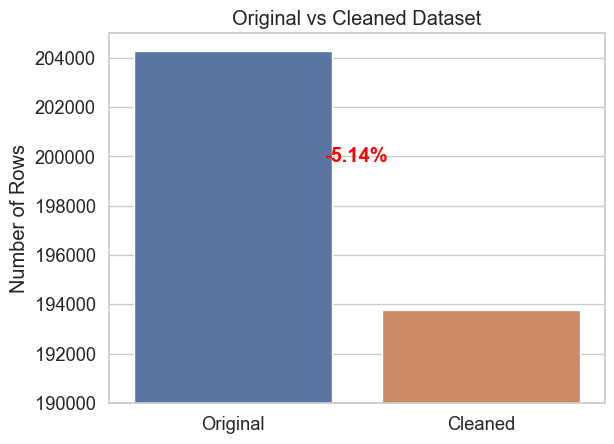

In [244]:
# Using Seaborn and inputing data values
x_labels = ['Original', 'Cleaned']
x_values = [204267, 193776]

#Get the percentage Difference for the before and after
percent = round((x_values[1] - x_values[0]) / x_values[0] * 100, 2)
percentage_text = f'{percent}%'

sns.set_style("whitegrid")
sns.barplot(x=x_labels, y=x_values)
plt.title('Original vs Cleaned Dataset')
plt.ylabel('Number of Rows')
plt.ylim(190000, 205000)
#Just to position a value of how much the dataset has srunk
plt.text(0.5, 200000, percentage_text, ha='center', va='center', fontweight='bold', color='red') 
plt.show()

Based on the chart above we have shrunk our data set by 5.14%. 

In [245]:
# Now that i am happy with the Dataset will save the new Dataset as Cleaned_TSA_claims.csv.
# This will enable us to use it in Tableau

df.to_csv("cleaned_TSA_claims.csv", index=True )

### 2.1 How has the trend of claims been progressing over the years?

In [246]:
#TSA corporate colors 
tsa_colors = ['#18453B', '#F9A51A', '#0072C6', '#71A6D2', '#F0E90A', '#E31937']

<Figure size 1500x1000 with 0 Axes>

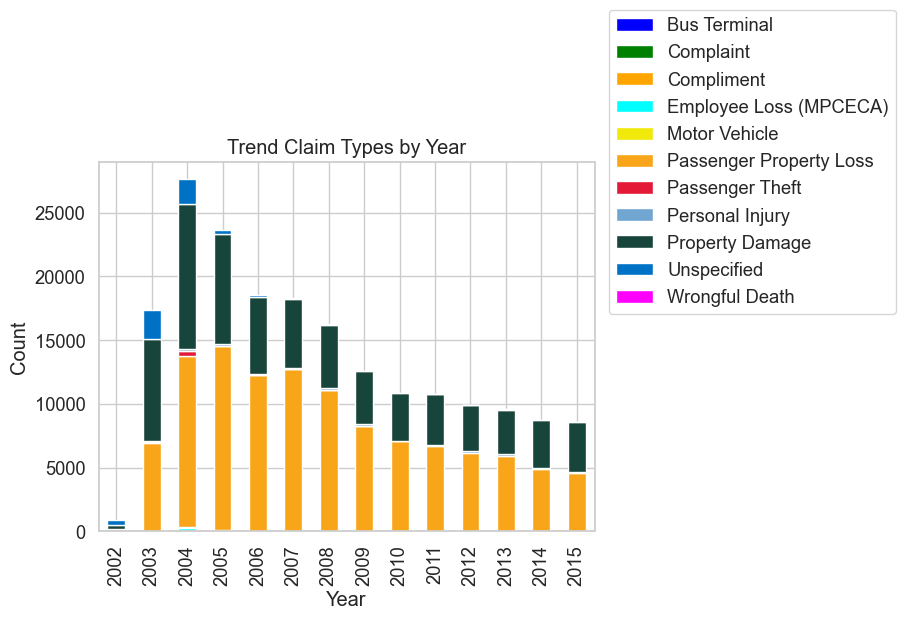

In [247]:
colors_dict = {
    'Property Damage': '#18453B',
    'Passenger Property Loss': '#F9A51A',
    'Unspecified': '#0072C6',
    'Personal Injury': '#71A6D2',
    'Motor Vehicle': '#F0E90A',
    'Passenger Theft': '#E31937',
    'Employee Loss (MPCECA)': '#00FFFF',
    'Wrongful Death': '#FF00FF',
    'Bus Terminal': '#0000FF',
    'Complaint': '#008000',
    'Compliment': '#FFA500'
}


claim_types = ['Property Damage', 'Passenger Property Loss', 'Unspecified',
       'Personal Injury', 'Motor Vehicle', 'Passenger Theft',
       'Employee Loss (MPCECA)', 'Wrongful Death', 'Bus Terminal',
       'Complaint', 'Compliment']
df_filtered = df[df['Claim Type'].isin(claim_types)]

# Group by Year and claim type
df_grouped = df_filtered.groupby(['Year', 'Claim Type']).size().reset_index(name='Count')

# Use a Pivot Table to allocate accordingly so its easier to chart
df_pivot = df_grouped.pivot(index='Year', columns='Claim Type', values='Count').fillna(0)

# set it so we can save it and use it later
plt.figure(figsize=(15, 10))

# Create a stacked bar chart of the claim types by year
ax = df_pivot.plot(kind='bar', stacked=True, color=[colors_dict.get(x, '#333333') for x in df_pivot.columns])

# title and axis labels
plt.title('Trend Claim Types by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Move the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1.01, 1))
plt.savefig('claim_types_year.png', dpi=300, bbox_inches='tight')


plt.show()

#### 2.1.1 Insight

We can see:-

2002 to 2004:<br>
Sharp increase. 2002 was low because that was when the TSA was introduced to the general public. Than to 2004 issued increase. This is probably due where by the TSA was still adjusting and adopting to their roles. 

2004 to 2015:<br>
Over all trend declines. I had googled what was the cause for the lowwer occurances of claims was probably due to technology. Such as naked scanners that was introduced in 2007 adopted slowly to a few airports and later adopted by all airports.

1. Passenger Property Loss is the highest amounts of claims filed against the TSA.
<br>
Followed by Passenger Property Damange.

2. Trend overall indcates that claims have been slowly declining over the years. This is probably due to introduction of new screening technique such as the full-body scanner that was slowly introduced in 2007. Than wildly adopted in 2010.
3. 2002 was low because that was when the TSA was introduced and the general public were getting to know them. 
4. The sharpe peak from 2002 to 2005 generally suggested more incidents happened and that the general public were familiar with the organization. 
5. Unspecified Claim Types have occured less often in 2006.

Over all the trends suggest that claims have been in a decreasing trend and that the TSA have been getting at their jobs in carrying out screening processes.

###### Naked Scanner Link:  __Transportation Security Administration. (2010, October 29). TSA Administrator Pistole testifies before Senate on aviation security. Retrieved March 24, 2023, from https://www.tsa.gov/news/press/testimony/tsa-administrator-pistole-testifies-senate-aviation-security__

### 2.2 What is the share of each Claim type distributed througout our range?

We will use a pie chart of this to see how its spread out.

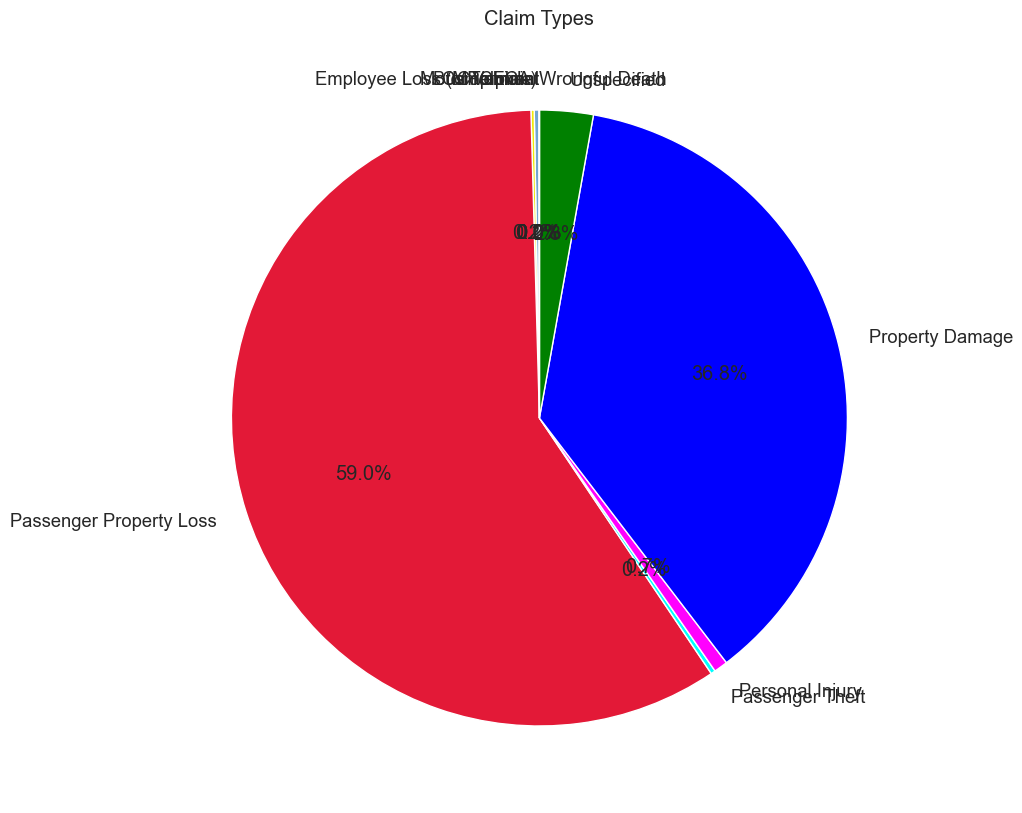

In [254]:
claim_counts = df_grouped.groupby('Claim Type').sum()['Count'].to_dict()

colors = ['#18453B', '#F9A51A', '#0072C6', '#71A6D2', '#F0E90A', '#E31937', '#00FFFF', '#FF00FF', '#0000FF', '#008000', '#FFA500']

abels = list(claim_counts.keys())
for i in range(len(labels)):
    if labels[i] not in ['Passenger Property Loss', 'Property Damage']:
        labels[i] = ''

plt.figure(figsize=(10,10))
plt.pie(claim_counts.values(), labels=claim_counts.keys(), colors=colors, autopct='%1.1f%%', startangle=90)
plt.savefig('claim_types_pie.png', dpi=300, bbox_inches='tight')
# Set the title of the chart
plt.title('Claim Types')
plt.show()

### 2.3 Where have the most amount of claims have been heppening and is it the same throughout the years.

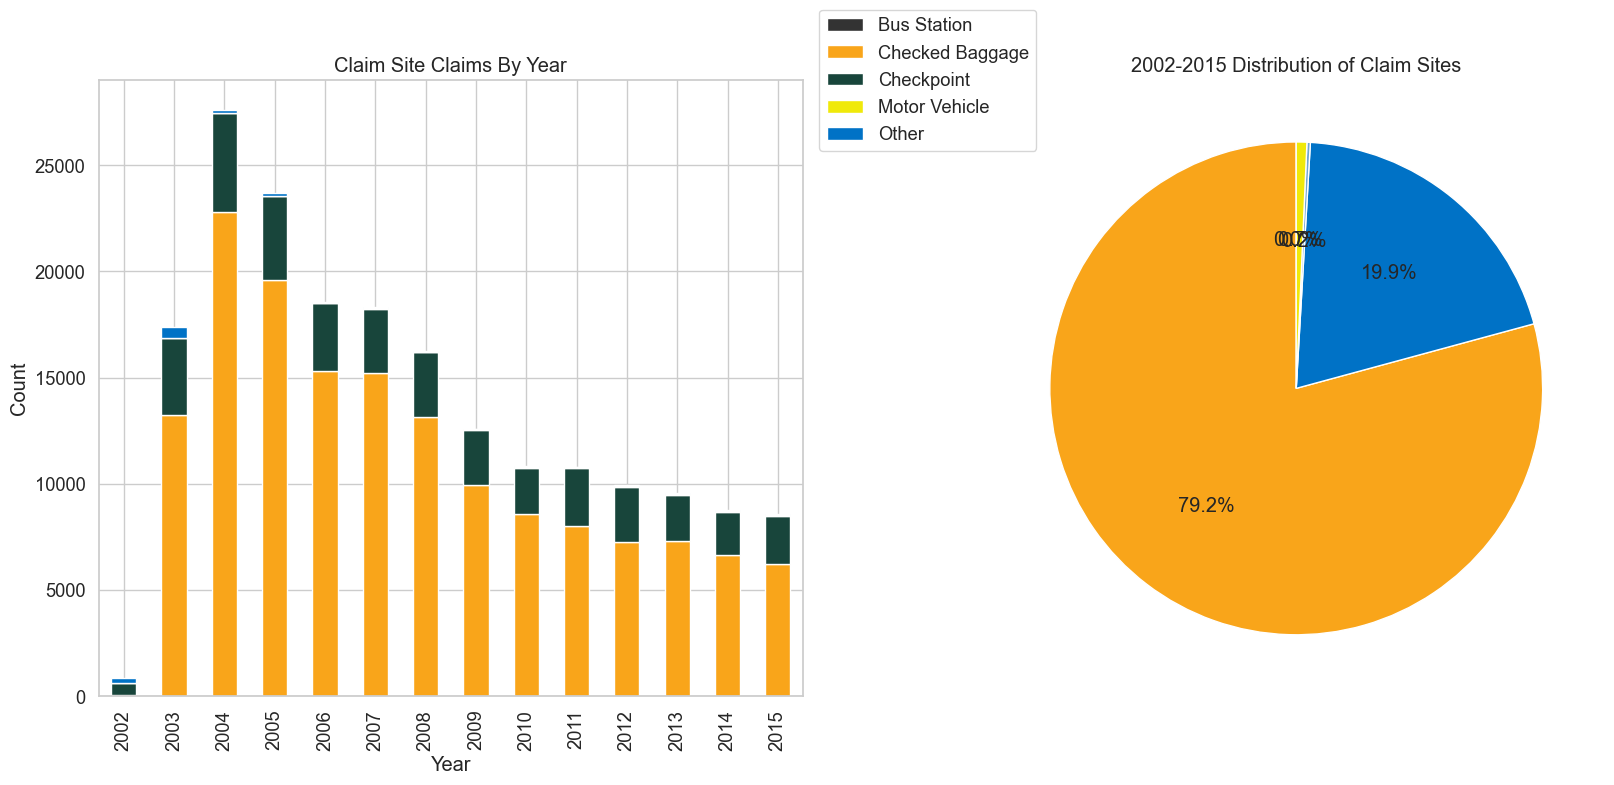

In [255]:
colors_dict = {
    'Checkpoint': '#18453B',
    'Checked Baggage': '#F9A51A',
    'Other': '#0072C6',
    'Personal Injury': '#71A6D2',
    'Motor Vehicle': '#F0E90A',
    'Passenger Theft': '#E31937',
    'Employee Loss (MPCECA)': '#00FFFF',
    'Wrongful Death': '#FF00FF',
    'Bus Terminal': '#0000FF',
    'Complaint': '#008000',
    'Compliment': '#FFA500'
}


df_grouped = df.groupby(['Year', 'Claim Site']).size().reset_index(name='Count')

df_pivot = df_grouped.pivot(index='Year', columns='Claim Site', values='Count').fillna(0)

labels = df['Claim Site'].unique()
colors = ['#18453B', '#F9A51A', '#0072C6', '#71A6D2', '#F0E90A', '#E31937', '#00FFFF', '#FF00FF', '#0000FF', '#008000', '#FFA500']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

df_pivot.plot(kind='bar', stacked=True, color=[colors_dict.get(x, '#333333') for x in df_pivot.columns], ax=ax1)
ax1.set_title('Claim Site Claims By Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 1))

claim_type_count = df.groupby('Claim Site').size().reset_index(name='Count')
wedges, texts, autotexts = ax2.pie(claim_type_count['Count'], labels=None, colors=colors, autopct='%1.1f%%', startangle=90)

ax2.set_title('2002-2015 Distribution of Claim Sites')

# Save the figure to a file and show the plot
plt.savefig('claim_site_trend_and_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


### 2.3.1 Insight

We can see that a big majority of claim occurances happens around the check baggage area. Taking close to 80% majority of time. followed by Checkpoint. 

One assumption I would like to point out is for the causes for checked baggage site is probably due to miss management of baggege handling by airlines or airport personal. But with the limited information that I have, I would assume:-

1) Increased ambiguity inceases the likelihood of claim incident to arise. 
2) Airport infrastructure would be a factor. As all the airports existed prior to the TSA. 
3) The less physical contact the TSA required in the screening process increases the likelihood to decrease claim occurances. As liability would fall away from the TSA.



### 2.4 What has been the trend and share of disposition of claims.


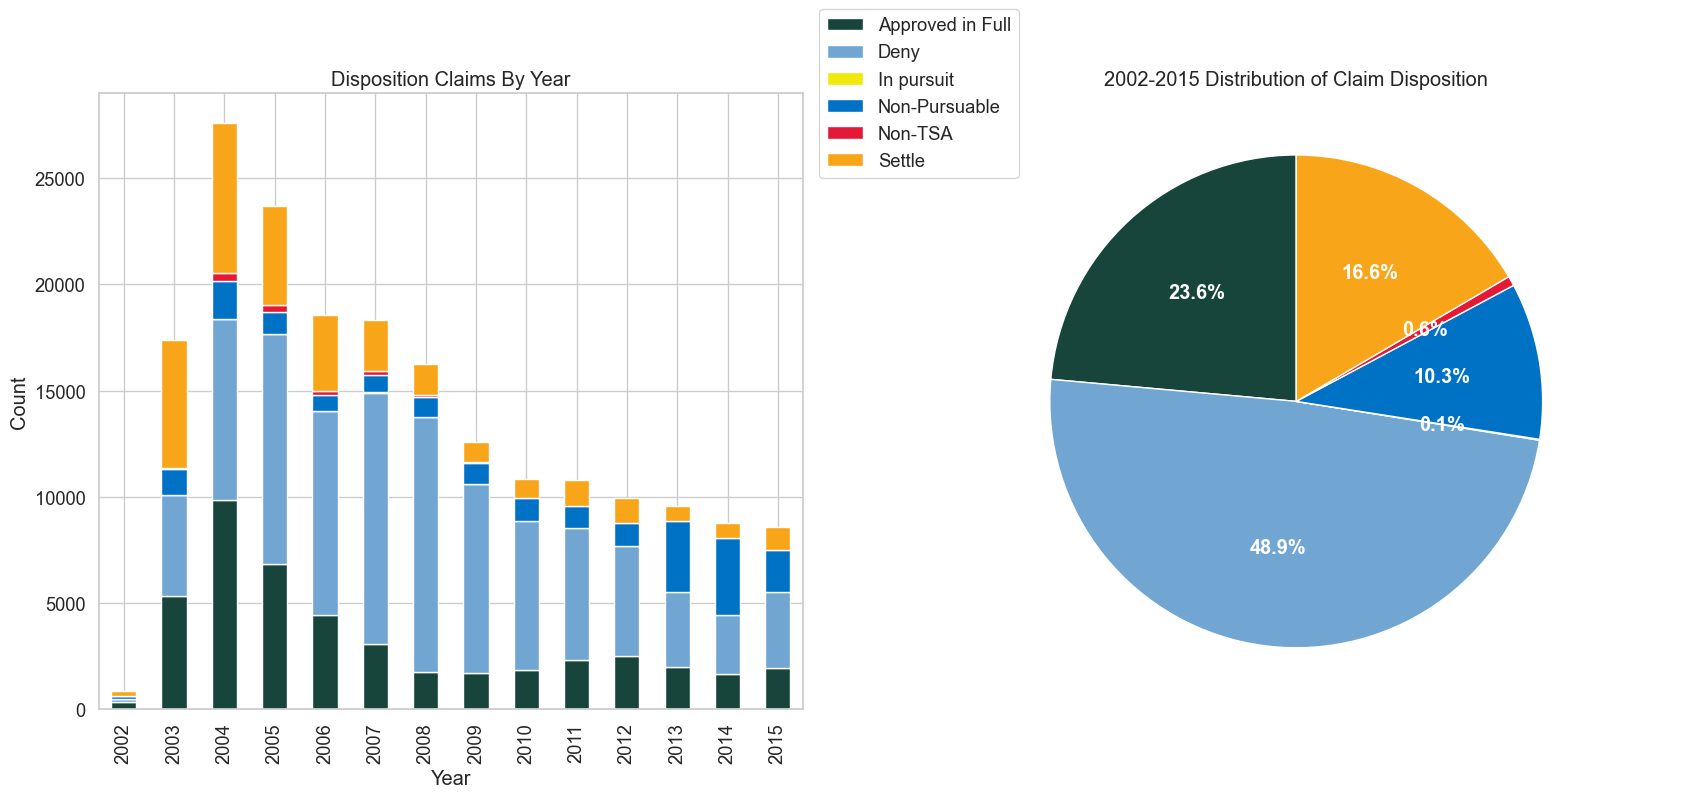

In [256]:
colors_dict = {
    'Approved in Full': '#18453B',
    'Settle': '#F9A51A',
    'Non-Pursuable': '#0072C6',
    'Deny': '#71A6D2',
    'In pursuit': '#F0E90A',
    'Non-TSA': '#E31937',
}

df_grouped = df.groupby(['Year', 'Disposition']).size().reset_index(name='Count')

df_pivot = df_grouped.pivot(index='Year', columns='Disposition', values='Count').fillna(0)

labels = df['Disposition'].unique()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

df_pivot.plot(kind='bar', stacked=True, color=[colors_dict.get(x, '#333333') for x in df_pivot.columns], ax=ax1)
ax1.set_title('Disposition Claims By Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 1))

Disposition_count = df.groupby('Disposition').size().reset_index(name='Count')
colors = [colors_dict.get(x, '#333333') for x in Disposition_count['Disposition']]
wedges, texts, autotexts = ax2.pie(Disposition_count['Count'], labels=Disposition_count['Disposition'], colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'w', 'fontweight': 'bold'})

ax2.set_title('2002-2015 Distribution of Claim Disposition')

# Save the figure to a file and show the plot
plt.savefig('Disposition_trend_and_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


Should check if disposition is the same throughout claim sites.

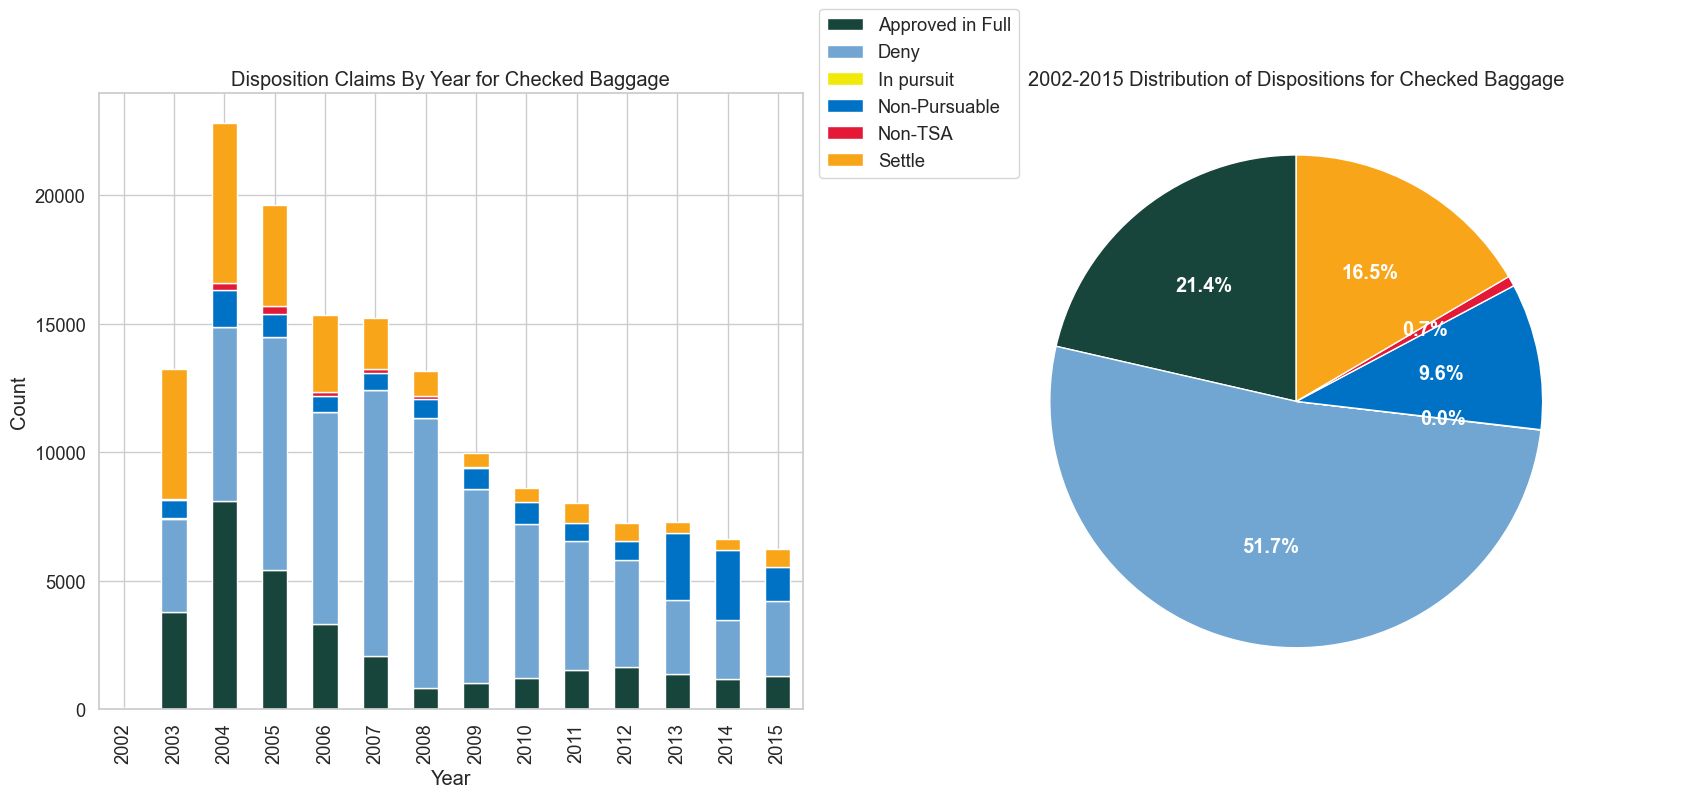

In [257]:
colors_dict = {
    'Approved in Full': '#18453B',
    'Settle': '#F9A51A',
    'Non-Pursuable': '#0072C6',
    'Deny': '#71A6D2',
    'In pursuit': '#F0E90A',
    'Non-TSA': '#E31937',
}

# Filter the data for only Checked Baggage
df_filtered = df[df['Claim Site'] == 'Checked Baggage']

df_grouped = df_filtered.groupby(['Year', 'Disposition']).size().reset_index(name='Count')

df_pivot = df_grouped.pivot(index='Year', columns='Disposition', values='Count').fillna(0)

labels = df_filtered['Disposition'].unique()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

df_pivot.plot(kind='bar', stacked=True, color=[colors_dict.get(x, '#333333') for x in df_pivot.columns], ax=ax1)
ax1.set_title('Disposition Claims By Year for Checked Baggage')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 1))

Disposition_count = df_filtered.groupby('Disposition').size().reset_index(name='Count')
colors = [colors_dict.get(x, '#333333') for x in Disposition_count['Disposition']]
wedges, texts, autotexts = ax2.pie(Disposition_count['Count'], labels=Disposition_count['Disposition'], colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'w', 'fontweight': 'bold'})

ax2.set_title('2002-2015 Distribution of Dispositions for Checked Baggage')

plt.savefig('disposition_checked_baggage.png', dpi=300, bbox_inches='tight')
plt.show()


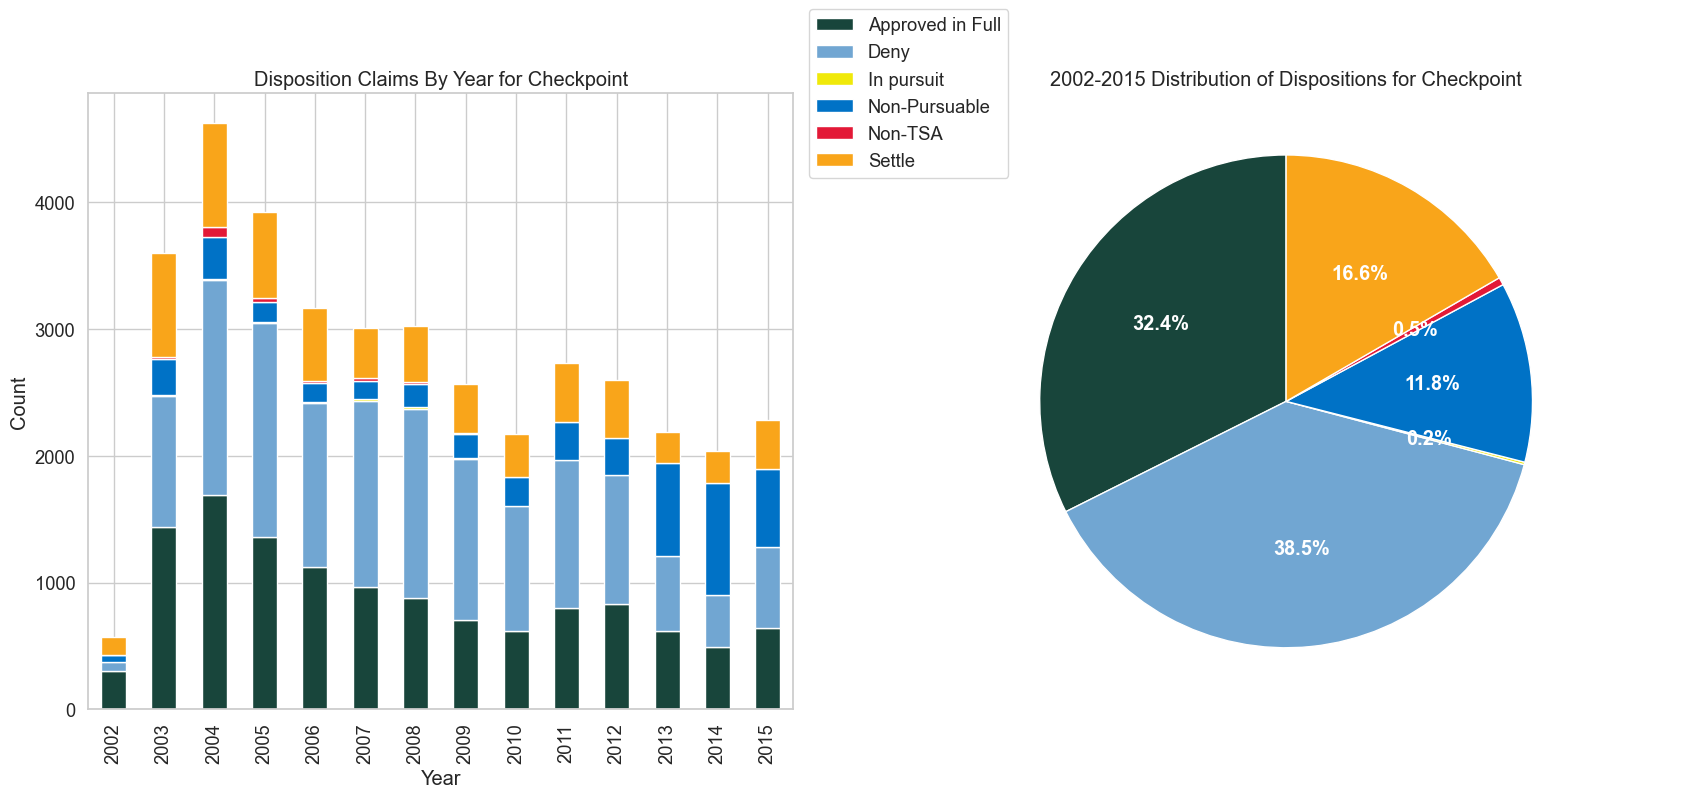

In [258]:
colors_dict = {
    'Approved in Full': '#18453B',
    'Settle': '#F9A51A',
    'Non-Pursuable': '#0072C6',
    'Deny': '#71A6D2',
    'In pursuit': '#F0E90A',
    'Non-TSA': '#E31937',
}

# Filter the data for only Checkpoint
df_filtered = df[df['Claim Site'] == 'Checkpoint']

df_grouped = df_filtered.groupby(['Year', 'Disposition']).size().reset_index(name='Count')

df_pivot = df_grouped.pivot(index='Year', columns='Disposition', values='Count').fillna(0)

labels = df_filtered['Disposition'].unique()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

df_pivot.plot(kind='bar', stacked=True, color=[colors_dict.get(x, '#333333') for x in df_pivot.columns], ax=ax1)
ax1.set_title('Disposition Claims By Year for Checkpoint')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 1))

Disposition_count = df_filtered.groupby('Disposition').size().reset_index(name='Count')
colors = [colors_dict.get(x, '#333333') for x in Disposition_count['Disposition']]
wedges, texts, autotexts = ax2.pie(Disposition_count['Count'], labels=Disposition_count['Disposition'], colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'w', 'fontweight': 'bold'})

ax2.set_title('2002-2015 Distribution of Dispositions for Checkpoint')

plt.savefig('disposition_checkpoint.png', dpi=300, bbox_inches='tight')
plt.show()


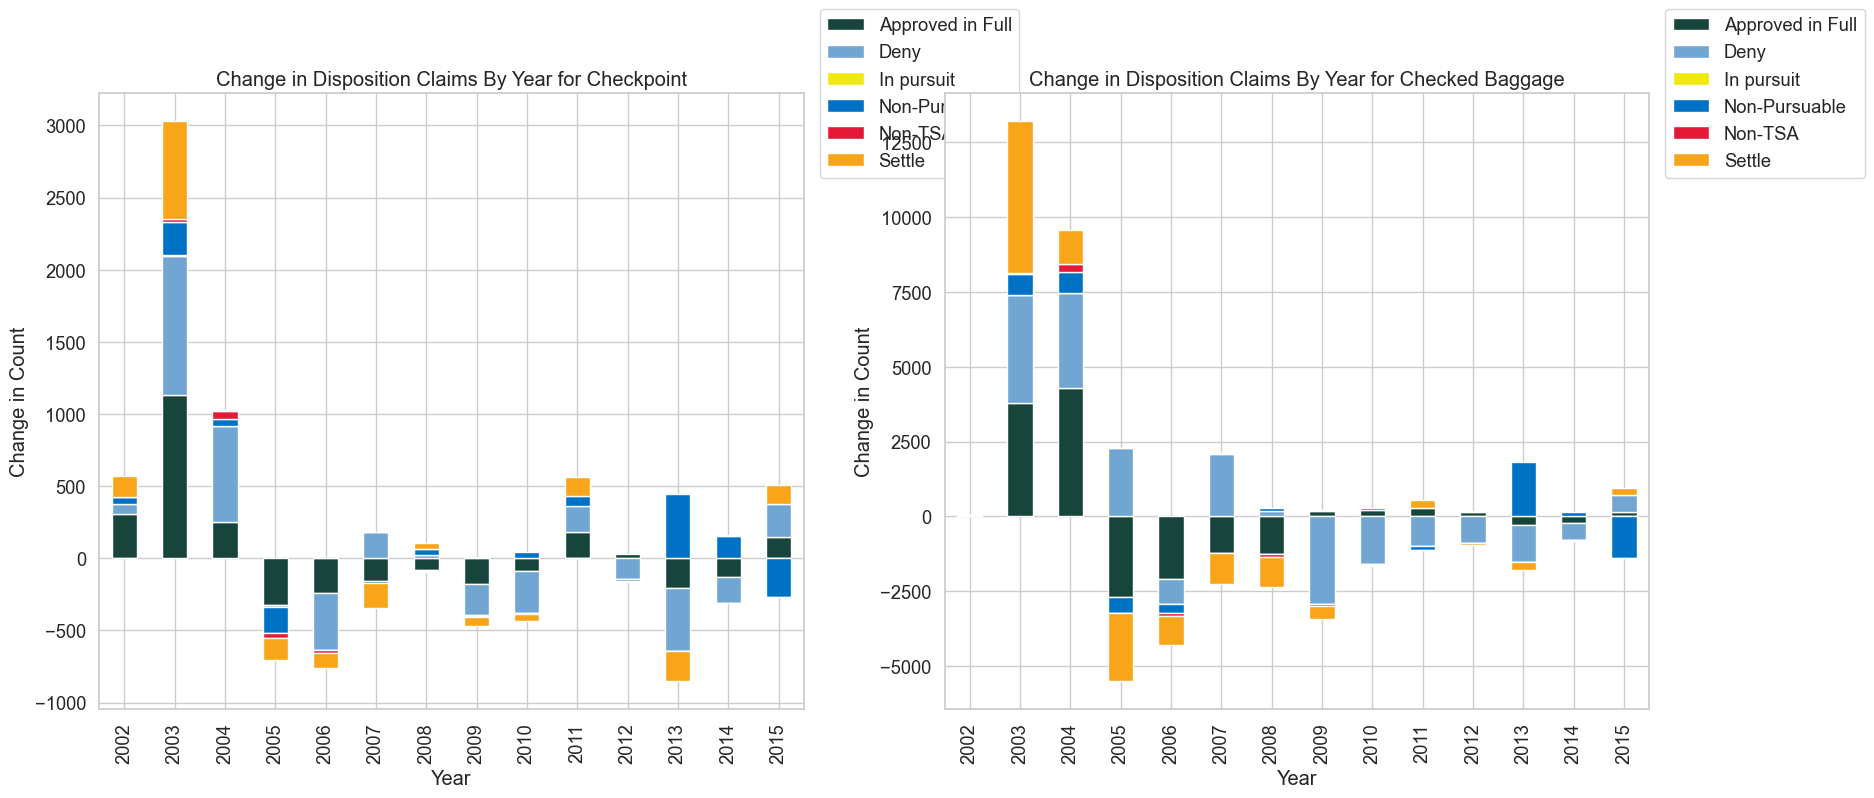

In [259]:
colors_dict = {
    'Approved in Full': '#18453B',
    'Settle': '#F9A51A',
    'Non-Pursuable': '#0072C6',
    'Deny': '#71A6D2',
    'In pursuit': '#F0E90A',
    'Non-TSA': '#E31937',
}

# Filter the data for Checkpoint and Checked Baggage
df_checkpoint = df[df['Claim Site'] == 'Checkpoint']
df_checked_baggage = df[df['Claim Site'] == 'Checked Baggage']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot for Checkpoint
df_grouped_checkpoint = df_checkpoint.groupby(['Year', 'Disposition']).size().reset_index(name='Count')
df_pivot_checkpoint = df_grouped_checkpoint.pivot(index='Year', columns='Disposition', values='Count').fillna(0)
df_change_pivot_checkpoint = df_pivot_checkpoint.diff()
df_change_pivot_checkpoint = df_change_pivot_checkpoint.fillna(df_pivot_checkpoint)
df_change_pivot_checkpoint.plot(kind='bar', stacked=True, color=[colors_dict.get(x, '#333333') for x in df_change_pivot_checkpoint.columns], ax=ax1)
ax1.set_title('Change in Disposition Claims By Year for Checkpoint')
ax1.set_xlabel('Year')
ax1.set_ylabel('Change in Count')
ax1.legend(loc='center left', bbox_to_anchor=(1.01, 1))

# Plot for Checked Baggage
df_grouped_checked_baggage = df_checked_baggage.groupby(['Year', 'Disposition']).size().reset_index(name='Count')
df_pivot_checked_baggage = df_grouped_checked_baggage.pivot(index='Year', columns='Disposition', values='Count').fillna(0)
df_change_pivot_checked_baggage = df_pivot_checked_baggage.diff()
df_change_pivot_checked_baggage = df_change_pivot_checked_baggage.fillna(df_pivot_checked_baggage)
df_change_pivot_checked_baggage.plot(kind='bar', stacked=True, color=[colors_dict.get(x, '#333333') for x in df_change_pivot_checked_baggage.columns], ax=ax2)
ax2.set_title('Change in Disposition Claims By Year for Checked Baggage')
ax2.set_xlabel('Year')
ax2.set_ylabel('Change in Count')
ax2.legend(loc='center left', bbox_to_anchor=(1.01, 1))

# Save the figure to a file and show the plot
plt.savefig('change_in_disposition.png', dpi=300, bbox_inches='tight')
plt.show()


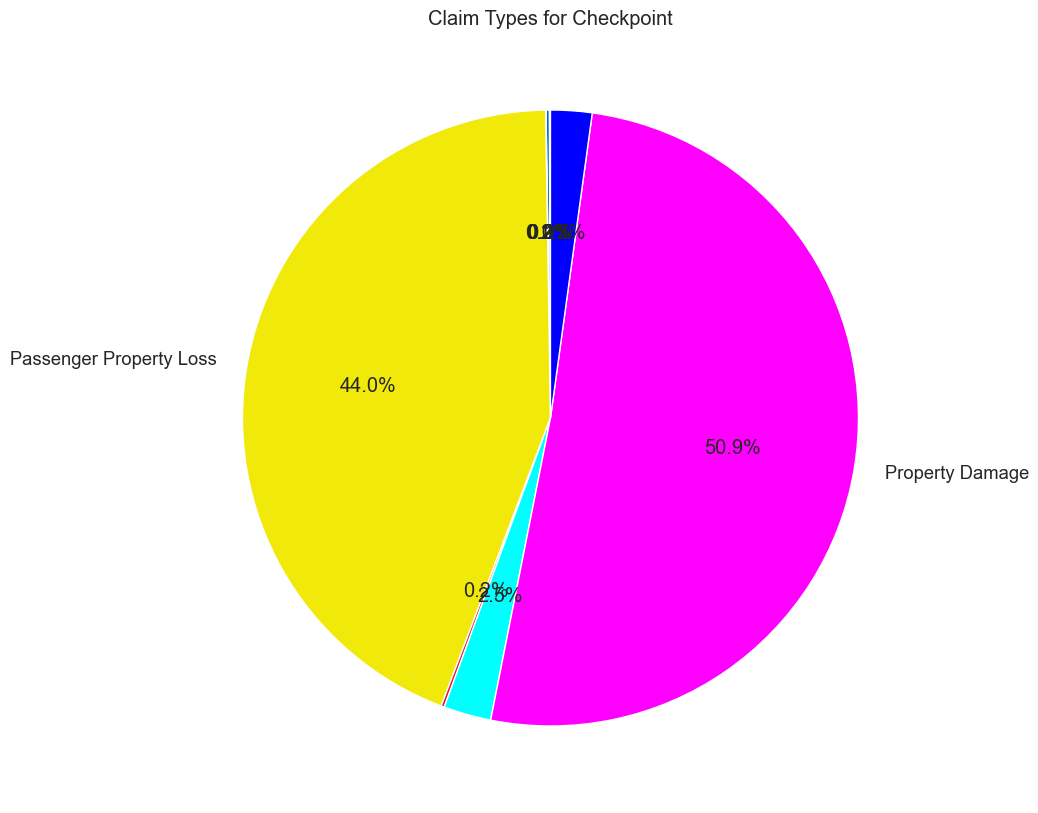

In [260]:
df_filtered = df[df['Claim Site'] == 'Checkpoint']
df_grouped = df_filtered.groupby('Claim Type').size().reset_index(name='Count')
claim_counts = df_grouped.set_index('Claim Type')['Count'].to_dict()

colors = ['#18453B', '#F9A51A', '#0072C6', '#71A6D2', '#F0E90A', '#E31937', '#00FFFF', '#FF00FF', '#0000FF', '#008000', '#FFA500']

labels = list(claim_counts.keys())
for i in range(len(labels)):
    if labels[i] not in ['Passenger Property Loss', 'Property Damage']:
        labels[i] = ''

plt.figure(figsize=(10,10))
plt.pie(claim_counts.values(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set the title of the chart
plt.title('Claim Types for Checkpoint')
plt.savefig('claim_types_checkpoint.png', dpi=300, bbox_inches='tight')
plt.show()

### 2.4.1 Insight 

While analyzing the disposition of TSA claims, we observed that a significant proportion of claims are denied compensation. However, this does not necessarily indicate that the TSA is doing a good job by approving or denying more claims. The disposition of claims is based on various circumstances and cannot be generalized.

But one inference we can extract from the charts provided is that for claims approved indicates that something went wrong and making the agency liable. 

From there we would suggest that the TSA can further improve its operations at the Checkpoint site. Such as reviewing protocal and proceedure, providing training and working on public relations would help to benefit the agency for damange control. 

We derive this finding as from 2013 to 2015 there was an increased disposition by settling claims rather than approving them in full.

Also the majority of claims types that happen at Checkpoint was Property Damange. Which reinforces our claims that less TSA have to physically handle passenger property the less likelihood for something to go wrong. 



### 2.5 What are the Top items claimed against the TSA? 

In [ ]:
# Seperate the strings by using split on "; "
items_split = df['Item'].str.split('; ', expand=True)

# stack the columns and count the occurrences of each item
items_count = items_split.stack().value_counts()

# Do not count Other, etc and - 
items_count_filtered = items_count.drop(labels=[ 'Other','etc.', '-'])

# group the items by name and sum 
items_count_combined = items_count_filtered.groupby(level=0).sum()

# sort from big to small
items_count_combined = items_count_combined.sort_values(ascending=False)

# Just get the top 10 items that were claimed against the TSA 
df_item_top10 = pd.DataFrame({'item type': items_count_combined.index, 
                              'item count': items_count_combined.values})
# df_item_top10.to_csv('item_count_top10.csv', index=True)
df_item_top10.head(10)
# Save the dataframe to a CSV file
# item_pivot.to_csv('Item_Count_Site.csv', index=False)


,item type,item count
0,Luggage (all types including footlockers),19554
1,belts,17287
2,accessories,17287
3,Clothing - Shoes,17287
4,Cameras - Digital,11510
5,Jewelry - Fine,10726
6,Locks,10366
7,Computer - Laptop,9140
8,Baggage/Cases/Purses,8488
9,Clothing,7305


In [ ]:
df_item_top10.head(10).sum()

item type     Luggage (all types including footlockers)belts...
item count                                               128950
dtype: object

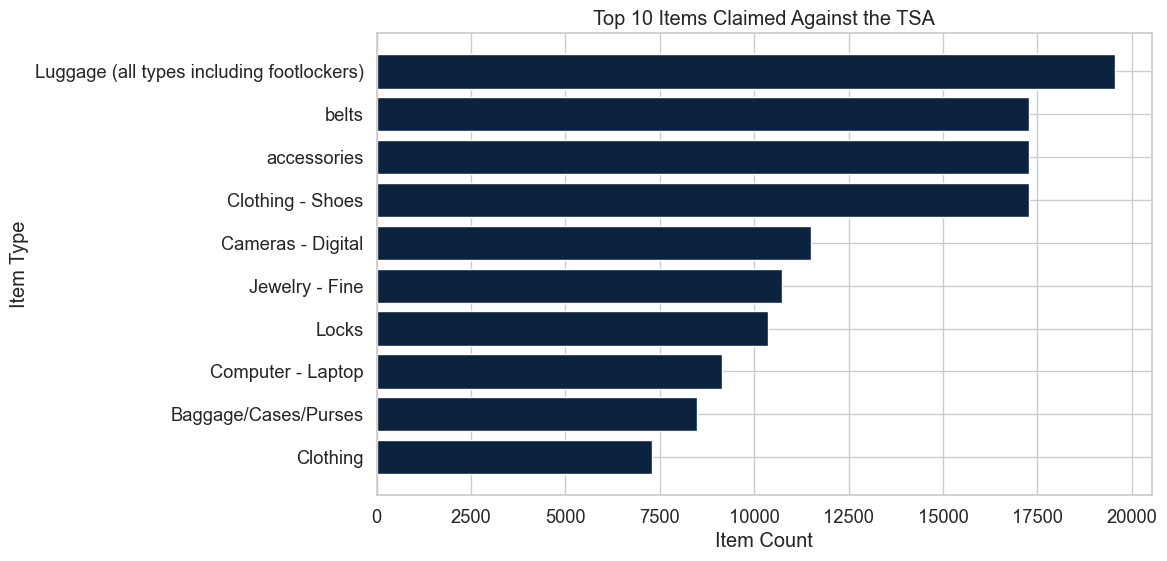

In [261]:
fig, ax = plt.subplots(figsize=(10, 6))

# Set the colors for the bars
colors = ["#0C2340"]

# Create the horizontal bar chart
ax.barh(y=df_item_top10['item type'][:10], width=df_item_top10['item count'][:10], color=colors)

# Set the title and axes labels
ax.set_title('Top 10 Items Claimed Against the TSA')
ax.set_xlabel('Item Count')
ax.set_ylabel('Item Type')

# Invert the y-axis to show the items in descending order
ax.invert_yaxis()
plt.savefig('Top10_items.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

We're going to narrow down our search to just focus on the most claimed items filed against the TSA. In total there has been __128,950__ items total claimed since 2002 to 2015. 

As a _disclosure_. The TSA has no Authority to prevent passengers from not traveling with these items. But some can be mitigated by launching initiatives to improve public awareness when traveling. As well, there is usually more than 1 item listed in claims amount so we are only getting the item count of all the claims.

But we are only looking at the charecteristics of these items weather items are approved and dissapproved the same.

In [ ]:
df_checked_baggage= df[df['Claim Site'] == 'Checked Baggage']

items_split_CB = df_checked_baggage['Item'].str.split('; ', expand=True)

# stack the columns and count the occurrences of each item
items_count_CB = items_split_CB.stack().value_counts()

# Do not count Other, etc and - 
items_count_CB_filtered = items_count_CB.drop(labels=[ 'Other','etc.', '-'])

# group the items by name and sum 
items_count_CB_combined = items_count_CB_filtered.groupby(level=0).sum()

# sort from big to small
items_count_CB_combined = items_count_CB_combined.sort_values(ascending=False)

df_CheckPoint= df[df['Claim Site'] == 'Checkpoint']

items_split_CP = df_CheckPoint['Item'].str.split('; ', expand=True)

# stack the columns and count the occurrences of each item
items_count_CP = items_split_CP.stack().value_counts()

# Do not count Other, etc and - 
items_count_CP_filtered = items_count_CP.drop(labels=[ 'Other','etc.', '-'])

# group the items by name and sum 
items_count_CP_combined = items_count_CP_filtered.groupby(level=0).sum()

# sort from big to small
items_count_CP_combined = items_count_CP_combined.sort_values(ascending=False)


# Just get the top 10 items that were claimed against the TSA 
df_item_top10_CB_N_CP = pd.DataFrame({'item type': items_count_CB_combined.index[:10], 
                              'item count_CB': items_count_CB_combined.values[:10],
                              'item count_CP': items_count_CP_combined.values[:10],
                              
                              })
df_item_top10_CB_N_CP

,item type,item count_CB,item count_CP
0,Luggage (all types including footlockers),17336,3262
1,Clothing - Shoes,14770,2708
2,accessories,14770,2396
3,belts,14770,2394
4,Locks,10168,2394
5,Cameras - Digital,9965,2394
6,Jewelry - Fine,7936,1999
7,Baggage/Cases/Purses,7561,1966
8,Clothing,6275,1814
9,Computer - Laptop,5809,1670


In [ ]:
df_item_top10_CB_N_CP["item type"].unique()

array(['Luggage (all types including footlockers)', 'Clothing - Shoes',
       'accessories', 'belts', 'Locks', 'Cameras - Digital',
       'Jewelry - Fine', 'Baggage/Cases/Purses', 'Clothing',
       'Computer - Laptop'], dtype=object)

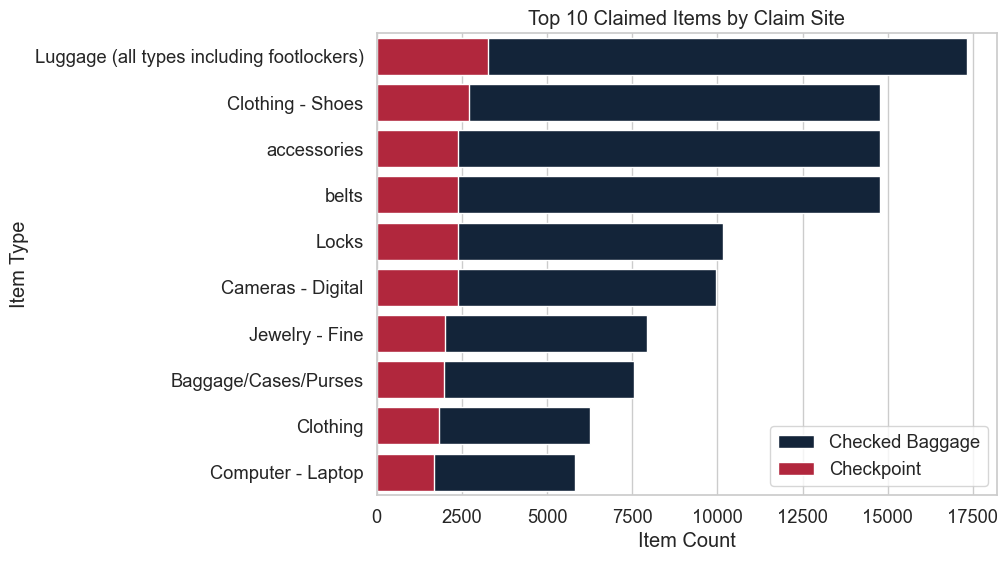

In [262]:
# Set the TSA corporate colors
TSA_colors = ["#0C2340", "#C8102E"]

# Create a horizontal bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(x="item count_CB", y="item type", data=df_item_top10_CB_N_CP, color=TSA_colors[0], label="Checked Baggage")
ax = sns.barplot(x="item count_CP", y="item type", data=df_item_top10_CB_N_CP, color=TSA_colors[1], label="Checkpoint")
ax.set_xlabel("Item Count")
ax.set_ylabel("Item Type")
ax.set_title("Top 10 Claimed Items by Claim Site")
plt.legend()
plt.savefig('Items_claim_site.png', dpi=300, bbox_inches='tight')
plt.show()

Based on the chart it is understandable that Luggage/Baggage and Locks. These items are frequently checked and inspected by TSA agents, which may increase the chances of damage or loss during the inspection process. Additionally, Locks are often removed by TSA agents for inspection purposes, and sometimes are not properly re-secured, leading to loss or damage.

This further elaborate our points to invest in resources in developing new Search and screening technique and integrating more technology in the process. 

In [ ]:

# List to check desired Items to compare
desired_items = ['Luggage (all types including footlockers)', 'Clothing - Shoes',
       'accessories', 'belts', 'Locks', 'Cameras - Digital',
       'Jewelry - Fine', 'Baggage/Cases/Purses', 'Clothing',
       'Computer - Laptop']

# Create dataframes for items list based on approve deny and claim site.
df_item_approve_checkpoint = df[(df['Disposition'] == "Approved in Full") & (df['Claim Site'] == "Checkpoint")]
df_item_deny_checkpoint = df[(df['Disposition'] == "Deny") & (df['Claim Site'] == "Checkpoint")]
df_item_approve_checked = df[(df['Disposition'] == "Approved in Full") & (df['Claim Site'] == "Checked Baggage")]
df_item_deny_checked = df[(df['Disposition'] == "Deny") & (df['Claim Site'] == "Checked Baggage")]

# Split the items and count the occurrences for Checkpoint
items_split_checkpoint_approve = df_item_approve_checkpoint['Item'].str.split('; ', expand=True)
items_split_checkpoint_deny = df_item_deny_checkpoint['Item'].str.split('; ', expand=True)

items_count_checkpoint_approve = items_split_checkpoint_approve.stack().value_counts()
items_count_checkpoint_deny = items_split_checkpoint_deny.stack().value_counts()

items_count_filtered_checkpoint_approve = items_count_checkpoint_approve.drop(labels=['Other', 'etc.'])
items_count_filtered_checkpoint_approve = items_count_filtered_checkpoint_approve[items_count_filtered_checkpoint_approve.index.isin(desired_items)]
items_count_combined_approve_checkpoint = items_count_filtered_checkpoint_approve.groupby(level=0).sum()

items_count_filtered_checkpoint_deny = items_count_checkpoint_deny.drop(labels=['Other', 'etc.'])
items_count_filtered_checkpoint_deny = items_count_filtered_checkpoint_deny[items_count_filtered_checkpoint_deny.index.isin(desired_items)]
items_count_combined_deny_checkpoint = items_count_filtered_checkpoint_deny.groupby(level=0).sum()

df_item_compare_CP = pd.DataFrame({'Item Type': desired_items,
                                   'Item Count Approve': items_count_combined_approve_checkpoint.values,
                                   'Item Count Deny': items_count_combined_deny_checkpoint.values})
df_item_compare_CP['Total Count'] = df_item_compare_CP['Item Count Approve'] + df_item_compare_CP['Item Count Deny']
df_item_compare_CP.sort_values(by='Total Count', ascending=False, inplace=True)


# Split the items and count the occurrences for Checked Baggage
items_split_checked_approve = df_item_approve_checked['Item'].str.split('; ', expand=True)
items_split_checked_deny = df_item_deny_checked['Item'].str.split('; ', expand=True)

items_count_checked_approve = items_split_checked_approve.stack().value_counts()
items_count_checked_deny = items_split_checked_deny.stack().value_counts()

items_count_filtered_checked_approve = items_count_checked_approve.drop(labels=['Other', 'etc.'])
items_count_filtered_checked_approve = items_count_filtered_checked_approve[items_count_filtered_checked_approve.index.isin(desired_items)]
items_count_combined_approve_checked = items_count_filtered_checked_approve.groupby(level=0).sum()

items_count_filtered_checked_deny = items_count_checked_deny.drop(labels=['Other', 'etc.'])
items_count_filtered_checked_deny = items_count_filtered_checked_deny[items_count_filtered_checked_deny.index.isin(desired_items)]
items_count_combined_deny_checked = items_count_filtered_checked_deny.groupby(level=0).sum()

# Create the final dataframe for Checked Baggage
df_item_compare_CB = pd.DataFrame({'Item Type': desired_items,
                                   'Item Count Approve': items_count_combined_approve_checked.values,
                                   'Item Count Deny': items_count_combined_deny_checked.values})
df_item_compare_CB['Total Count'] = df_item_compare_CB['Item Count Approve'] + df_item_compare_CB['Item Count Deny']

# Sort the dataframe by the total count of each item
df_item_compare_CB.sort_values(by='Total Count', ascending=False, inplace=True)

# Print the dataframe
display(df_item_compare_CP,df_item_compare_CB)


,Item Type,Item Count Approve,Item Count Deny,Total Count
5,Cameras - Digital,624,1554,2178
4,Locks,763,1305,2068
3,belts,1076,834,1910
8,Clothing,1076,834,1910
9,Computer - Laptop,1076,834,1910
7,Baggage/Cases/Purses,935,481,1416
1,Clothing - Shoes,283,767,1050
2,accessories,383,333,716
0,Luggage (all types including footlockers),425,180,605
6,Jewelry - Fine,77,62,139


,Item Type,Item Count Approve,Item Count Deny,Total Count
7,Baggage/Cases/Purses,3703,8263,11966
3,belts,3944,7112,11056
8,Clothing,3944,7112,11056
9,Computer - Laptop,3944,7112,11056
6,Jewelry - Fine,4073,5139,9212
1,Clothing - Shoes,653,6073,6726
5,Cameras - Digital,974,4688,5662
0,Luggage (all types including footlockers),1128,4284,5412
2,accessories,1117,3540,4657
4,Locks,272,4303,4575


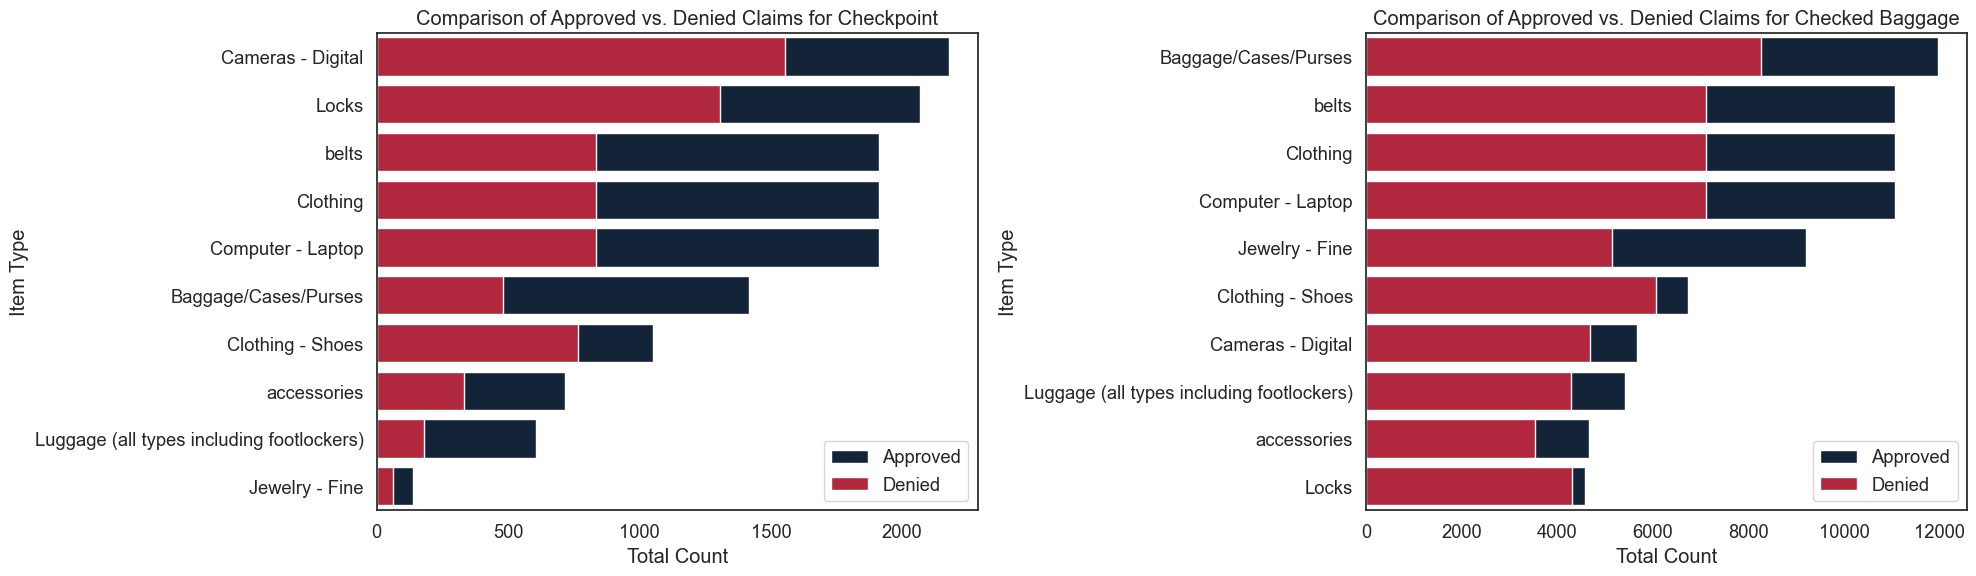

In [266]:
# Create the bar plot for Approved in Full vs. Denied Claims for Checked Baggage
sns.set_style('white')
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))

# Plot for Checkpoint
sns.barplot(x='Total Count', y='Item Type', data=df_item_compare_CP, color=TSA_colors[0], label='Approved', ax=ax[0])
sns.barplot(x='Item Count Deny', y='Item Type', data=df_item_compare_CP, color=TSA_colors[1], label='Denied', ax=ax[0])
ax[0].set_xlabel('Total Count')
ax[0].set_ylabel('Item Type')
ax[0].set_title('Comparison of Approved vs. Denied Claims for Checkpoint')
ax[0].legend()

# Plot for Checked Baggage
sns.barplot(x='Total Count', y='Item Type', data=df_item_compare_CB, color=TSA_colors[0], label='Approved', ax=ax[1])
sns.barplot(x='Item Count Deny', y='Item Type', data=df_item_compare_CB, color=TSA_colors[1], label='Denied', ax=ax[1])
ax[1].set_xlabel('Total Count')
ax[1].set_ylabel('Item Type')
ax[1].set_title('Comparison of Approved vs. Denied Claims for Checked Baggage')
ax[1].legend()

plt.tight_layout()
plt.savefig('Items_apprvsdeny_checkpoint_and_checkedbaggage.png', dpi=300, bbox_inches='tight')
plt.show()


Based on the top items. Depending on claim site it is obvious that the site of occurance, shows that there is a higher probability that claims being denied over approve. 

On top of that depending on item type varies the rate of approval. 

So my suggestion would be that the TSA should increase initiatives around airports and work with airline companies to provide awareness on traveller safety and responsibility. Such as ensure luggage is secure and keep valueables close. 

### 2.6 Average airports of reported claims against the TSA. 

In [ ]:
airports = df['Airport Code'].unique()
dispositions = df['Disposition'].unique()
airport_disposition = pd.DataFrame(columns=["Airport", "Disposition", "Count"])

for airport in airports:
    airport_df = df[df["Airport Code"] == airport]
    for disposition in dispositions:
        count = airport_df[airport_df["Disposition"] == disposition].shape[0]
        airport_disposition = pd.concat([airport_disposition, pd.DataFrame({"Airport": airport, "Disposition": disposition, "Count": count}, index=[0])], ignore_index=True)

# Pivot the table
airport_disposition = pd.pivot_table(airport_disposition, values='Count', index='Airport', columns='Disposition', fill_value=0)

airport_disposition.sample(n=3)

Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Airport,,,,,,
BTM,8,8,0,2,0,5
PQI,1,2,0,0,0,0
BLV,0,1,0,2,0,6


In [ ]:
airport_counts = df['Airport Code'].value_counts()
avg_count = round(airport_counts.mean())
airport_counts_filtered = airport_counts[airport_counts >= avg_count].value_counts()
around_avg = airport_counts[airport_counts.between(avg_count-120, avg_count+120)]

print("Maximum Count of airport names appear: " + str(airport_counts.max()))
print("Average Count of airport names appear: " + str(avg_count))
print("Number of airports that count around the average.(Range 120 counts above and below Average): " + str(len(around_avg)))

Maximum Count of airport names appear: 9525
Average Count of airport names appear: 419
Number of airports that count around the average.(Range 120 counts above and below Average): 20


In [ ]:
# Only want airports that appear around average range
df_filtered = df[df['Airport Code'].isin(around_avg.index)]

grouped = df_filtered.groupby(['Airport Code', 'Disposition']).size().unstack(fill_value=0)

grouped['Total Disposition Count'] = grouped.sum(axis=1)


grouped['Total Approved in Full Count'] = grouped['Approved in Full']
grouped['Total Deny Count'] = grouped['Deny']


grouped = grouped.reset_index()

# Getting the Top 20
df_20 = grouped[['Airport Code', 'Total Disposition Count', 'Total Approved in Full Count', 'Total Deny Count']]
df_20.loc[:, "Proportion Approval %"] = np.round(((df_20["Total Approved in Full Count"] / df_20["Total Disposition Count"]) * 100),2)


df_20_ranked = df_20.sort_values(by=["Proportion Approval %"], ascending=False)

df_20_ranked = df_20_ranked.reset_index(drop=True)

df_20_ranked

C:\Users\User\AppData\Local\Temp\ipykernel_1344\2909424993.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20.loc[:, "Proportion Approval %"] = np.round(((df_20["Total Approved in Full Count"] / df_20["Total Disposition Count"]) * 100),2)


Disposition,Airport Code,Total Disposition Count,Total Approved in Full Count,Total Deny Count,Proportion Approval %
0,BOI,368,115,147,31.25
1,PSP,409,120,180,29.34
2,SDF,508,146,229,28.74
3,LIH,439,119,223,27.11
4,DAY,305,82,148,26.89
5,MSN,323,86,160,26.63
6,GSP,480,127,224,26.46
7,PWM,309,81,141,26.21
8,TUL,443,116,213,26.19
9,ISP,344,90,165,26.16


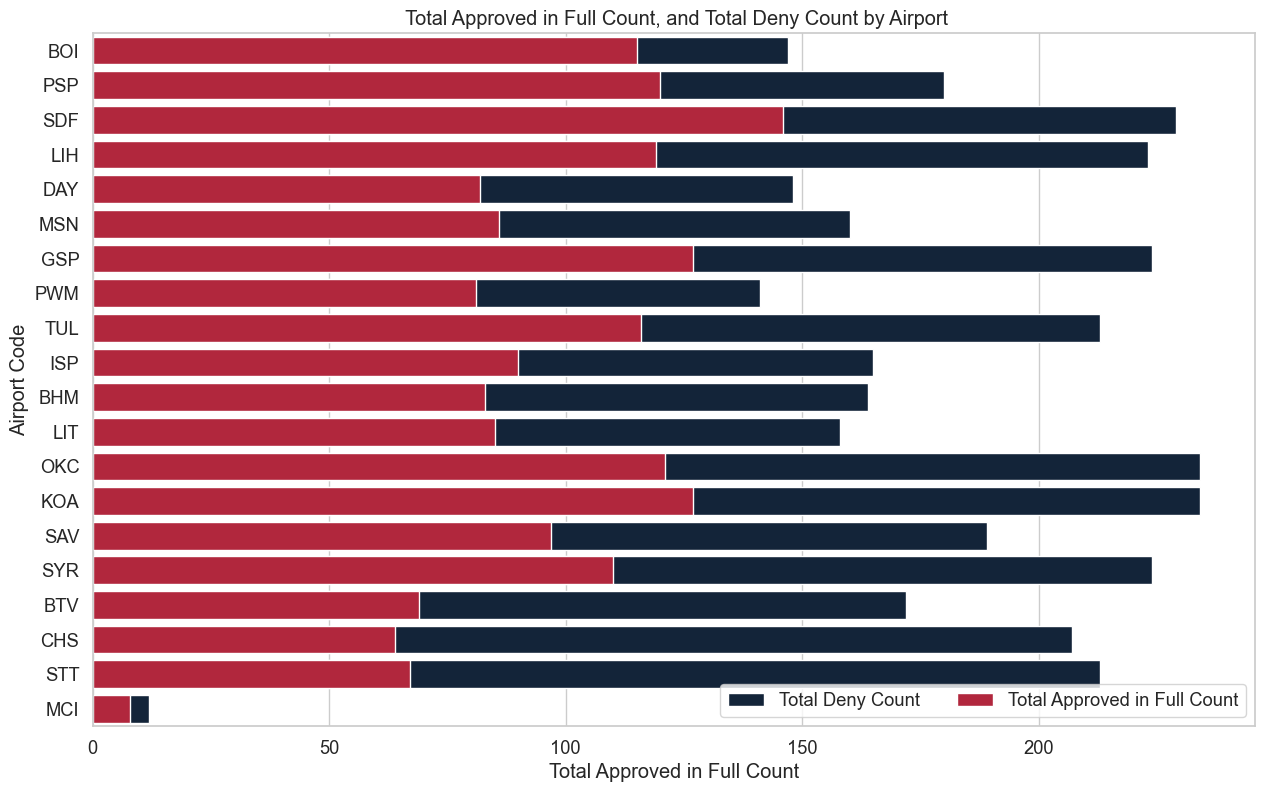

In [264]:
sns.set(style="whitegrid", font_scale=1.2)

TSA_colors = ["#0C2340", "#C8102E"]

plt.figure(figsize=(15, 9))

sns.barplot(x="Total Deny Count", y="Airport Code", data=df_20_ranked, label="Total Deny Count", color=TSA_colors[0])

sns.barplot(x="Total Approved in Full Count", y="Airport Code", data=df_20_ranked, label="Total Approved in Full Count", color=TSA_colors[1])

plt.legend(ncol=2, loc="lower right", frameon=True)
plt.title(" Total Approved in Full Count, and Total Deny Count by Airport")
plt.savefig('Disposition_airports.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import folium

airport_info = {
    'BOI': ('Boise Airport', (43.5644, -116.222), 'blue'),
    'PSP': ('Palm Springs International Airport', (33.8297, -116.5063), 'blue'),
    'SDF': ('Louisville International Airport', (38.1864, -85.7463), 'blue'),
    'LIH': ('Lihue Airport', (21.975, -159.3389), 'blue'),
    'DAY': ('Dayton International Airport', (39.9022, -84.2194), 'blue'),
    'MSN': ('Dane County Regional Airport', (43.1399, -89.3375), 'blue'),
    'GSP': ('Greenville-Spartanburg International Airport', (34.8957, -82.2189), 'blue'),
    'PWM': ('Portland International Jetport', (43.6462, -70.3093), 'blue'),
    'TUL': ('Tulsa International Airport', (36.1984, -95.8881), 'blue'),
    'ISP': ('Long Island MacArthur Airport', (40.7952, -73.1002), 'blue'),
    'BHM': ('Birmingham-Shuttlesworth International Airport', (33.5639, -86.7523), 'red'),
    'LIT': ('Bill and Hillary Clinton National Airport', (34.7294, -92.2244), 'red'),
    'OKC': ('Will Rogers World Airport', (35.3931, -97.6007), 'red'),
    'KOA': ('Kona International Airport', (19.7388, -156.0456), 'red'),
    'SAV': ('Savannah/Hilton Head International Airport', (32.1275, -81.2021), 'red'),
    'SYR': ('Syracuse Hancock International Airport', (43.1112, -76.1063), 'red'),
    'BTV': ('Burlington International Airport', (44.4719, -73.1533), 'red'),
    'CHS': ('Charleston International Airport', (32.8986, -80.0405), 'red'),
    'STT': ('Cyril E. King Airport', (18.3373, -64.9734), 'red'),
    'MCI': ('Kansas City International Airport', (39.2976, -94.7139), 'red')
}

m = folium.Map(location=[39.8283, -98.5795], zoom_start=3, gragging=False, zoom_control=False, scroll_wheel_zoom=False)

for code, (name, (lat, lon), color) in airport_info.items():
    folium.Marker(location=[lat, lon], popup=name, icon=folium.Icon(color=color)).add_to(m)


folium.PolyLine(locations=[(49.0000, -100.0000), (24.3963, -100.0000)], color='black').add_to(m)
m


The map above shows the consentration of airports and their likelihood of dissapproving claims. colored in red. The line cutting the middle of the US just divideds the US between East coast and West coast. 

We can see that the majority of the airports are concentrated on the east(right side) which also correlates to the US's population density. 

But we can see that the east cost TSA agency is much more forgiving north of the country compared to the south. Which could probably mean a difference in policy and tolerance. 

### 3 Chi-Square Test and relation

#### 3.1 Claim Site and disposition

In [ ]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['Claim Site'], df['Disposition'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Convert the contingency table into a pandas DataFrame
contingency_df = pd.DataFrame(contingency_table)

# Print the contingency table

contingency_df

Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Claim Site,,,,,,
Bus Station,1,8,0,6,0,0
Checked Baggage,32867,79398,41,14754,1036,25402
Checkpoint,12466,14808,63,4553,194,6403
Motor Vehicle,172,48,3,142,0,67
Other,177,500,7,440,11,209


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Claim Site'], df['Disposition'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Convert the contingency table to a pandas DataFrame
contingency_df = pd.DataFrame(contingency_table)

# Display the results
display(contingency_df)
print('\nChi-Squared Test Results:')
results = pd.DataFrame({'Chi-Squared': [chi2],
                        'Degrees of Freedom': [dof],
                        'P-value': [p]})
display(results)

# Determine if the null hypothesis should be rejected
if p < alpha:
    print('\nReject the null hypothesis.')
else:
    print('\nFail to reject the null hypothesis.')

Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Claim Site,,,,,,
Bus Station,1,8,0,6,0,0
Checked Baggage,32867,79398,41,14754,1036,25402
Checkpoint,12466,14808,63,4553,194,6403
Motor Vehicle,172,48,3,142,0,67
Other,177,500,7,440,11,209



Chi-Squared Test Results:


,Chi-Squared,Degrees of Freedom,P-value
0,4198.025219,20,0.0



Reject the null hypothesis.


In [ ]:
# Create a new dataframe with claim site and percentage of approved claims
df_approved = pd.DataFrame({'Claim Site': contingency_table.index, 
                             'Percentage Approved': contingency_table['Approved in Full'] / contingency_table.sum(axis=1) * 100})

# Round the percentage to 2 decimal places
df_approved['Percentage Approved'] = df_approved['Percentage Approved'].round(2)

# Sort the dataframe in descending order by percentage of approved claims
df_approved_sorted = df_approved.sort_values(by='Percentage Approved', ascending=False)
df_approved_sorted.reset_index(drop=True, inplace=True)

df_approved_sorted

,Claim Site,Percentage Approved
0,Motor Vehicle,39.81
1,Checkpoint,32.39
2,Checked Baggage,21.41
3,Other,13.17
4,Bus Station,6.67


#### 3.2 Claim Type vs Disposition

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Claim Type'], df['Disposition'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Convert the contingency table to a pandas DataFrame
contingency_df = pd.DataFrame(contingency_table)

# Display the results
display(contingency_df)
print('\nChi-Squared Test Results:')
results = pd.DataFrame({'Chi-Squared': [chi2],
                        'Degrees of Freedom': [dof],
                        'P-value': [p]})
display(results)

# Determine if the null hypothesis should be rejected
if p < alpha:
    print('\nReject the null hypothesis.')
else:
    print('\nFail to reject the null hypothesis.')

Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Claim Type,,,,,,
Bus Terminal,0,0,0,0,0,1
Complaint,5,8,0,31,0,0
Compliment,0,0,0,2,0,0
Employee Loss (MPCECA),176,152,2,39,9,96
Motor Vehicle,143,48,1,96,0,45
Passenger Property Loss,22883,61565,39,12957,811,16038
Passenger Theft,139,177,0,26,5,111
Personal Injury,91,656,52,453,7,154
Property Damage,20827,30599,16,5597,388,13885



Chi-Squared Test Results:


,Chi-Squared,Degrees of Freedom,P-value
0,9972.175849,50,0.0



Reject the null hypothesis.


#### 3.4 Airport vs Disposition

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Airport Code'], df['Disposition'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Convert the contingency table to a pandas DataFrame
contingency_df = pd.DataFrame(contingency_table)

# Display the results
display(contingency_df)
print('\nChi-Squared Test Results:')
results = pd.DataFrame({'Chi-Squared': [chi2],
                        'Degrees of Freedom': [dof],
                        'P-value': [p]})
display(results)

# Determine if the null hypothesis should be rejected
if p < alpha:
    print('\nReject the null hypothesis.')
else:
    print('\nFail to reject the null hypothesis.')

Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Airport Code,,,,,,
ABE,47,42,0,8,0,31
ABI,11,25,0,6,0,4
ABQ,280,404,1,85,0,164
ABR,6,16,0,4,0,5
ABY,8,25,0,2,0,2
...,...,...,...,...,...,...
YKM,9,23,0,7,0,5
YNG,6,10,0,5,0,3
YUM,10,12,0,6,0,4



Chi-Squared Test Results:


,Chi-Squared,Degrees of Freedom,P-value
0,129694.34968,2310,0.0



Reject the null hypothesis.


#### 3.4 Airline vs Disposition 

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Airline Name'], df['Disposition'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Convert the contingency table to a pandas DataFrame
contingency_df = pd.DataFrame(contingency_table)

# Display the results
display(contingency_df)
print('\nChi-Squared Test Results:')
results = pd.DataFrame({'Chi-Squared': [chi2],
                        'Degrees of Freedom': [dof],
                        'P-value': [p]})
display(results)

# Determine if the null hypothesis should be rejected
if p < alpha:
    print('\nReject the null hypothesis.')
else:
    print('\nFail to reject the null hypothesis.')

Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Airline Name,,,,,,
ATA Aerocondor,53,190,0,13,6,62
Aer Lingus,20,56,0,14,0,18
Aero California,1,1,0,0,0,1
Aero Costa Rica,0,0,0,1,0,0
Aero Flot,9,24,0,17,0,5
...,...,...,...,...,...,...
Westjet Airlines Ltd,83,151,0,50,0,43
Wiggins Airways,0,1,0,0,0,0
XL Airways,0,1,0,1,0,1



Chi-Squared Test Results:


,Chi-Squared,Degrees of Freedom,P-value
0,8768.728936,1160,0.0



Reject the null hypothesis.


#### 3.5 Month vs Disposition
This is interesting in checking weather Disposition is a seasonal occurance. But will have to investigate through each airport.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Month'], df['Disposition'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Convert the contingency table to a pandas DataFrame
contingency_df = pd.DataFrame(contingency_table)

# Display the results
display(contingency_df)
print('\nChi-Squared Test Results:')
results = pd.DataFrame({'Chi-Squared': [chi2],
                        'Degrees of Freedom': [dof],
                        'P-value': [p]})
display(results)

# Determine if the null hypothesis should be rejected
if p < alpha:
    print('\nReject the null hypothesis.')
else:
    print('\nFail to reject the null hypothesis.')

Disposition,Approved in Full,Deny,In pursuit,Non-Pursuable,Non-TSA,Settle
Month,,,,,,
1,4216,8923,7,1350,106,3067
2,3791,7261,10,1096,83,2625
3,4178,8291,13,1204,97,2858
4,3827,7819,8,1146,106,2608
5,4045,7759,12,1252,83,2715
6,4222,8041,11,1491,113,2919
7,3982,8556,11,1690,132,2953
8,4061,8817,12,1941,126,2864
9,3473,7803,14,1803,94,2512



Chi-Squared Test Results:


,Chi-Squared,Degrees of Freedom,P-value
0,2206.239125,55,0.0



Reject the null hypothesis.


### 4.0 Overview Findings
Based on our analysis here is a list of our insight:-

1) Overall claim occurances have been decreasing over the years.

2) Top major claims occurances are Passenger Property Loss and Property damange. 

3) Majority of claims happens at Checked Baggage and Checkpoint. 

4) The TSA mainly denies compensation to claimant but are not equal through out sites. 

5) Items are dispositioned different from each other and where the incident took place.

6) Top airports looked to investigate airports against deposition. We saw that disposition varies from location which could signal a difference in corprate culture. Without further data we can only sepculate.

### 5.0 Suggestions
#### 5.1 Decrease Trend
The adoption of new technology correlates with reduced claims. Encourage further development and implementation of screening technology to minimize errors.

#### 5.2 Claim Types
Passenger Property Loss: Enhance audit control measures and improve training and facilities for item searches.
Property Damage: Increase training for TSA agents at checkpoint sites.
#### 5.3 Claim Sites
Review airport infrastructure and TSA facilities at key locations to address high claims in checked baggage areas and checkpoint sites.

#### 5.4 Item Claim Deviation
Improve public awareness on travel items through public service announcements to reduce liabilities.

#### 5.5 Top Airports
Implement case study programs or agent exchange initiatives to address disparities in claim approval rates across different airports.